In [16]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import matplotlib as mpl

In [49]:
driver = "LEC"
year = 2023
race = "Monaco"

In [48]:
def plot_fastest_lap_gear_shift_visualization(driver, year, race):

    session = fastf1.get_session(year, race, "Q")
    session.load()

    lap = session.laps.pick_driver(driver).pick_fastest()
    tel = lap.get_telemetry()

    x = np.array(tel['X'].values)
    y = np.array(tel['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    gear = tel['nGear'].to_numpy().astype(float)

    cmap = cm.get_cmap('Paired')
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(gear)
    lc_comp.set_linewidth(4)

    fig, ax = plt.subplots()
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

    title = plt.suptitle(f"Fastest Lap Gear Shift Visualization\n"f"{lap['Driver']} - {session.event['EventName']} {session.event.year}")

    cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
    cbar.set_ticks(np.arange(1.5, 9.5))
    cbar.set_ticklabels(np.arange(1, 9))

    plt.legend(bbox_to_anchor=(1.0, 1.02))

    ax.set_facecolor("black")
    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')

    plt.tight_layout()
    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)
    plt.show()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']
/var/folders/3f/bkwfhm9j7p54kzwdxbhqkzxc0000gn/T/ipykernel_8579/1778127916.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will

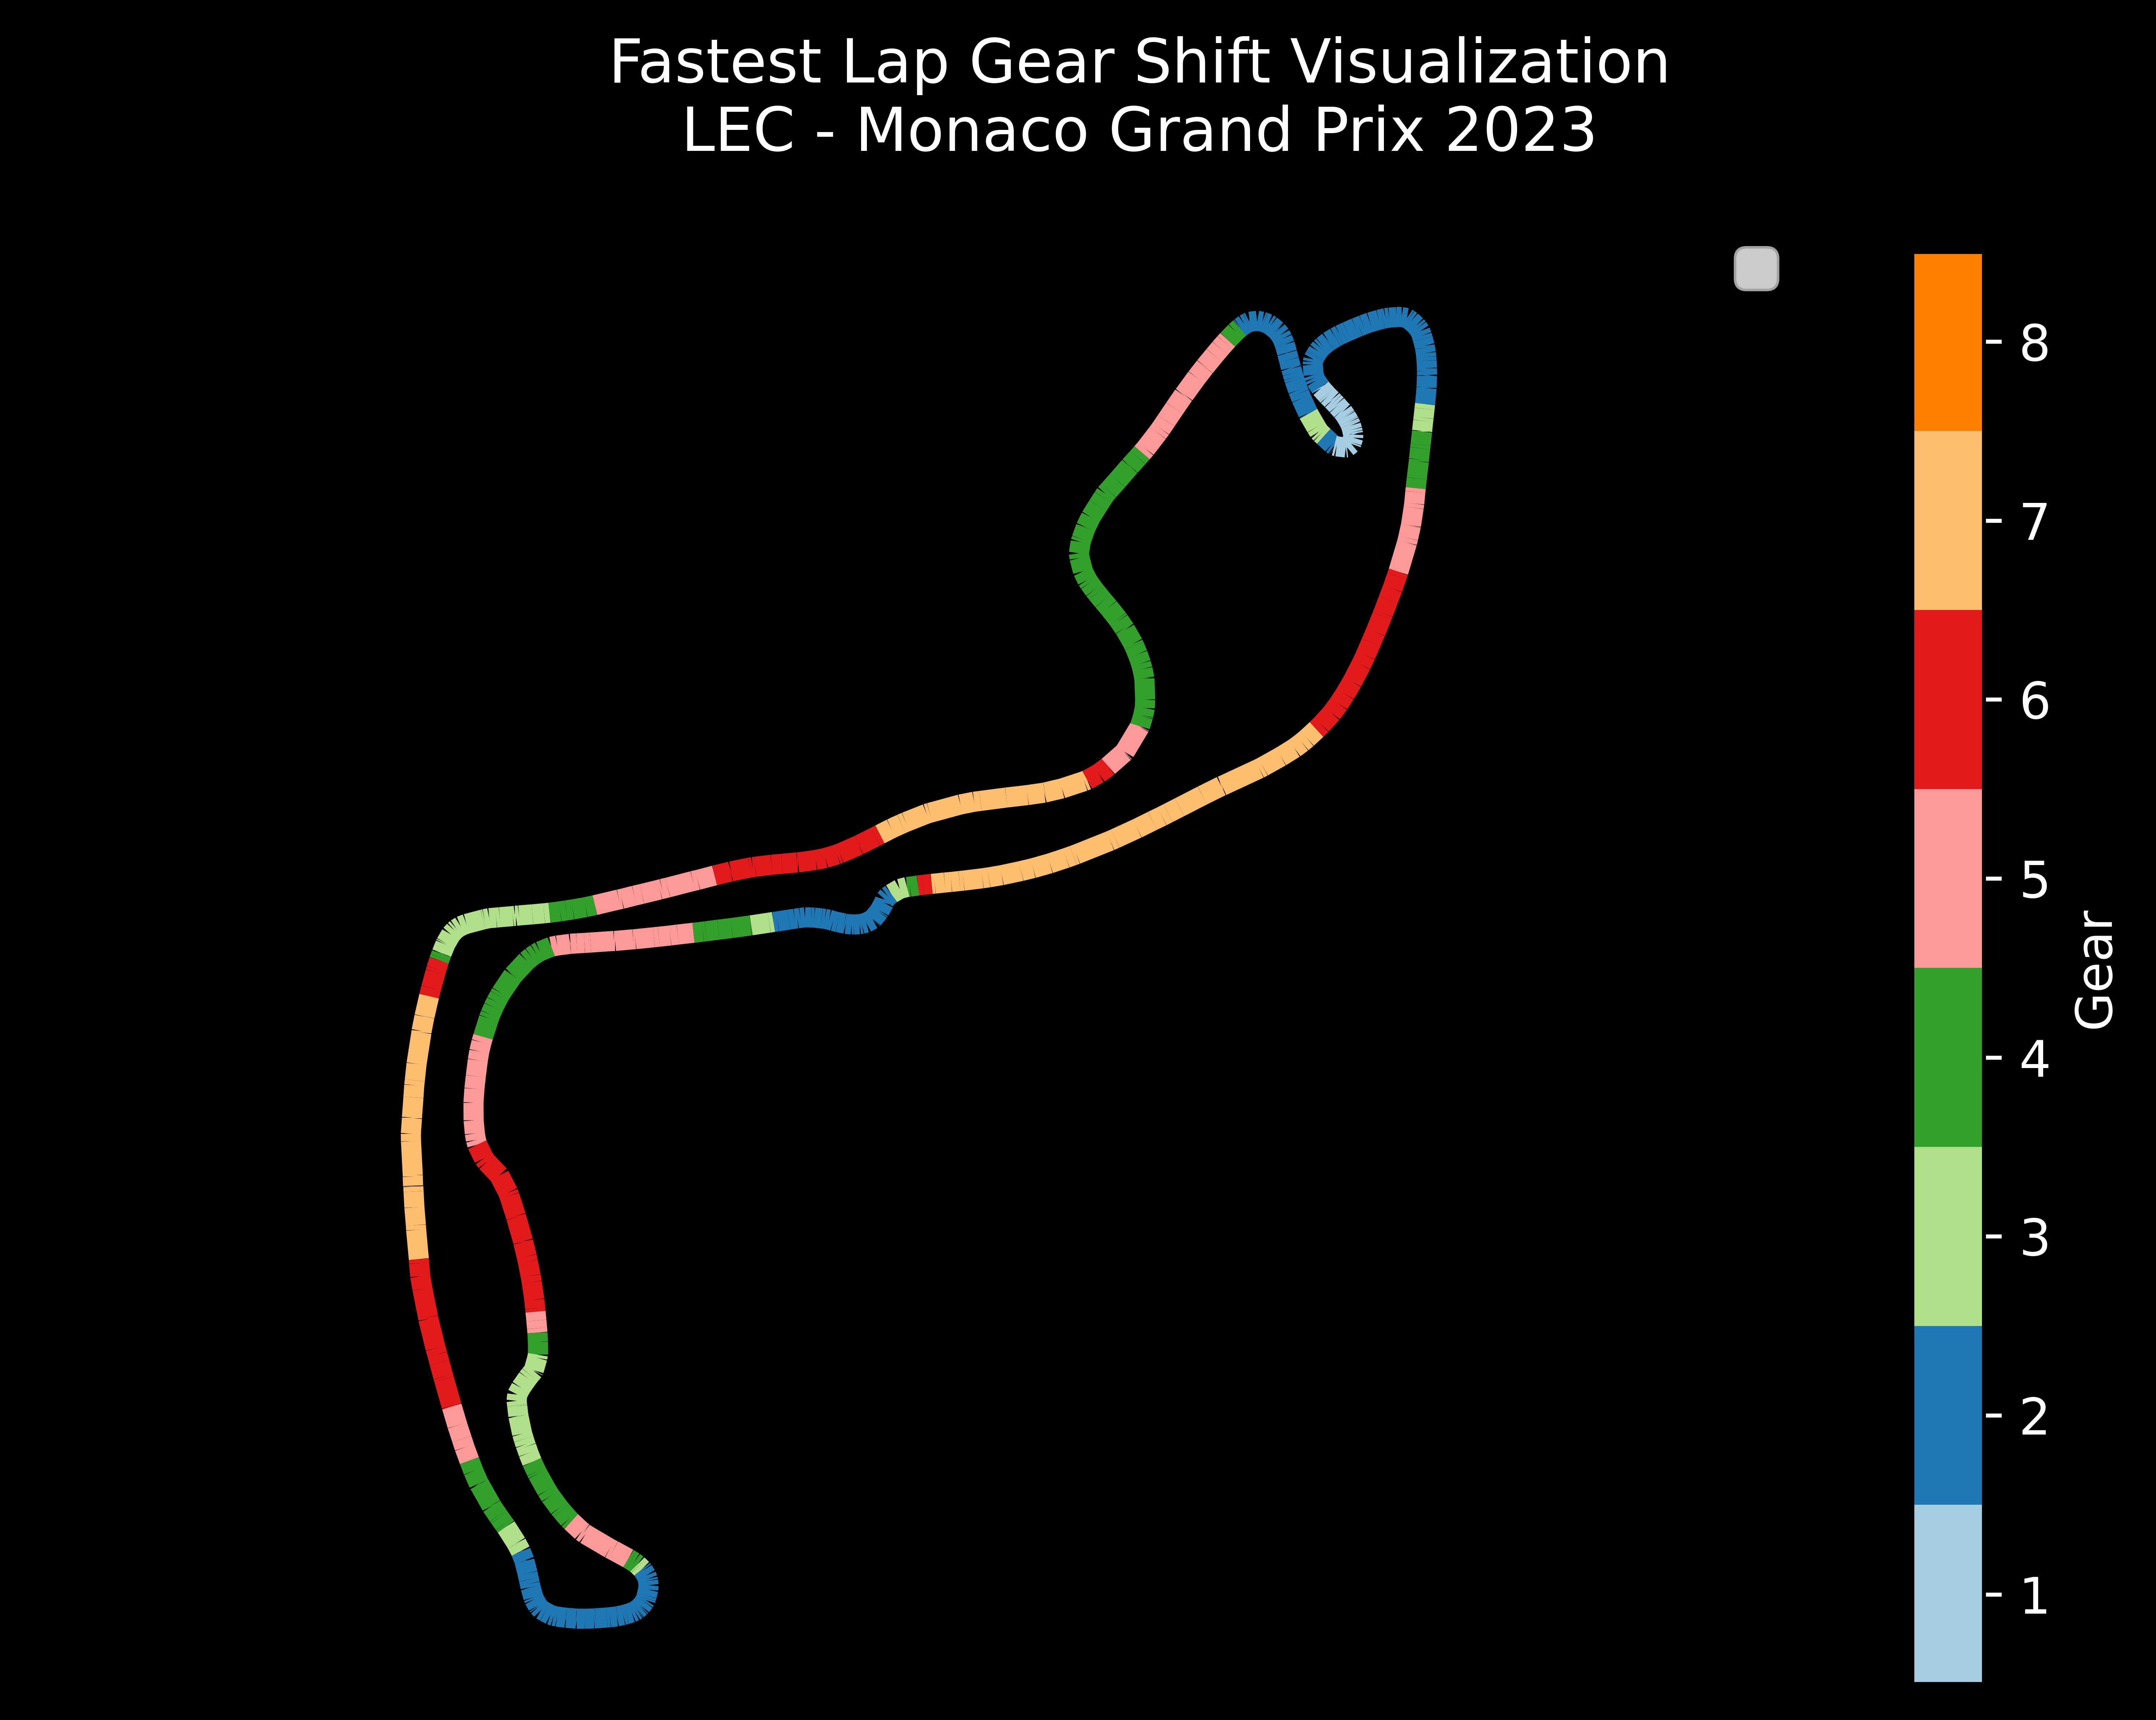

<Figure size 5e+06x5e+07 with 0 Axes>

In [50]:
plot_fastest_lap_gear_shift_visualization(driver, year, race)